# Expolore Data

In [22]:
import seaborn as sns
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [23]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

c:\Users\Ignacio Lembo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



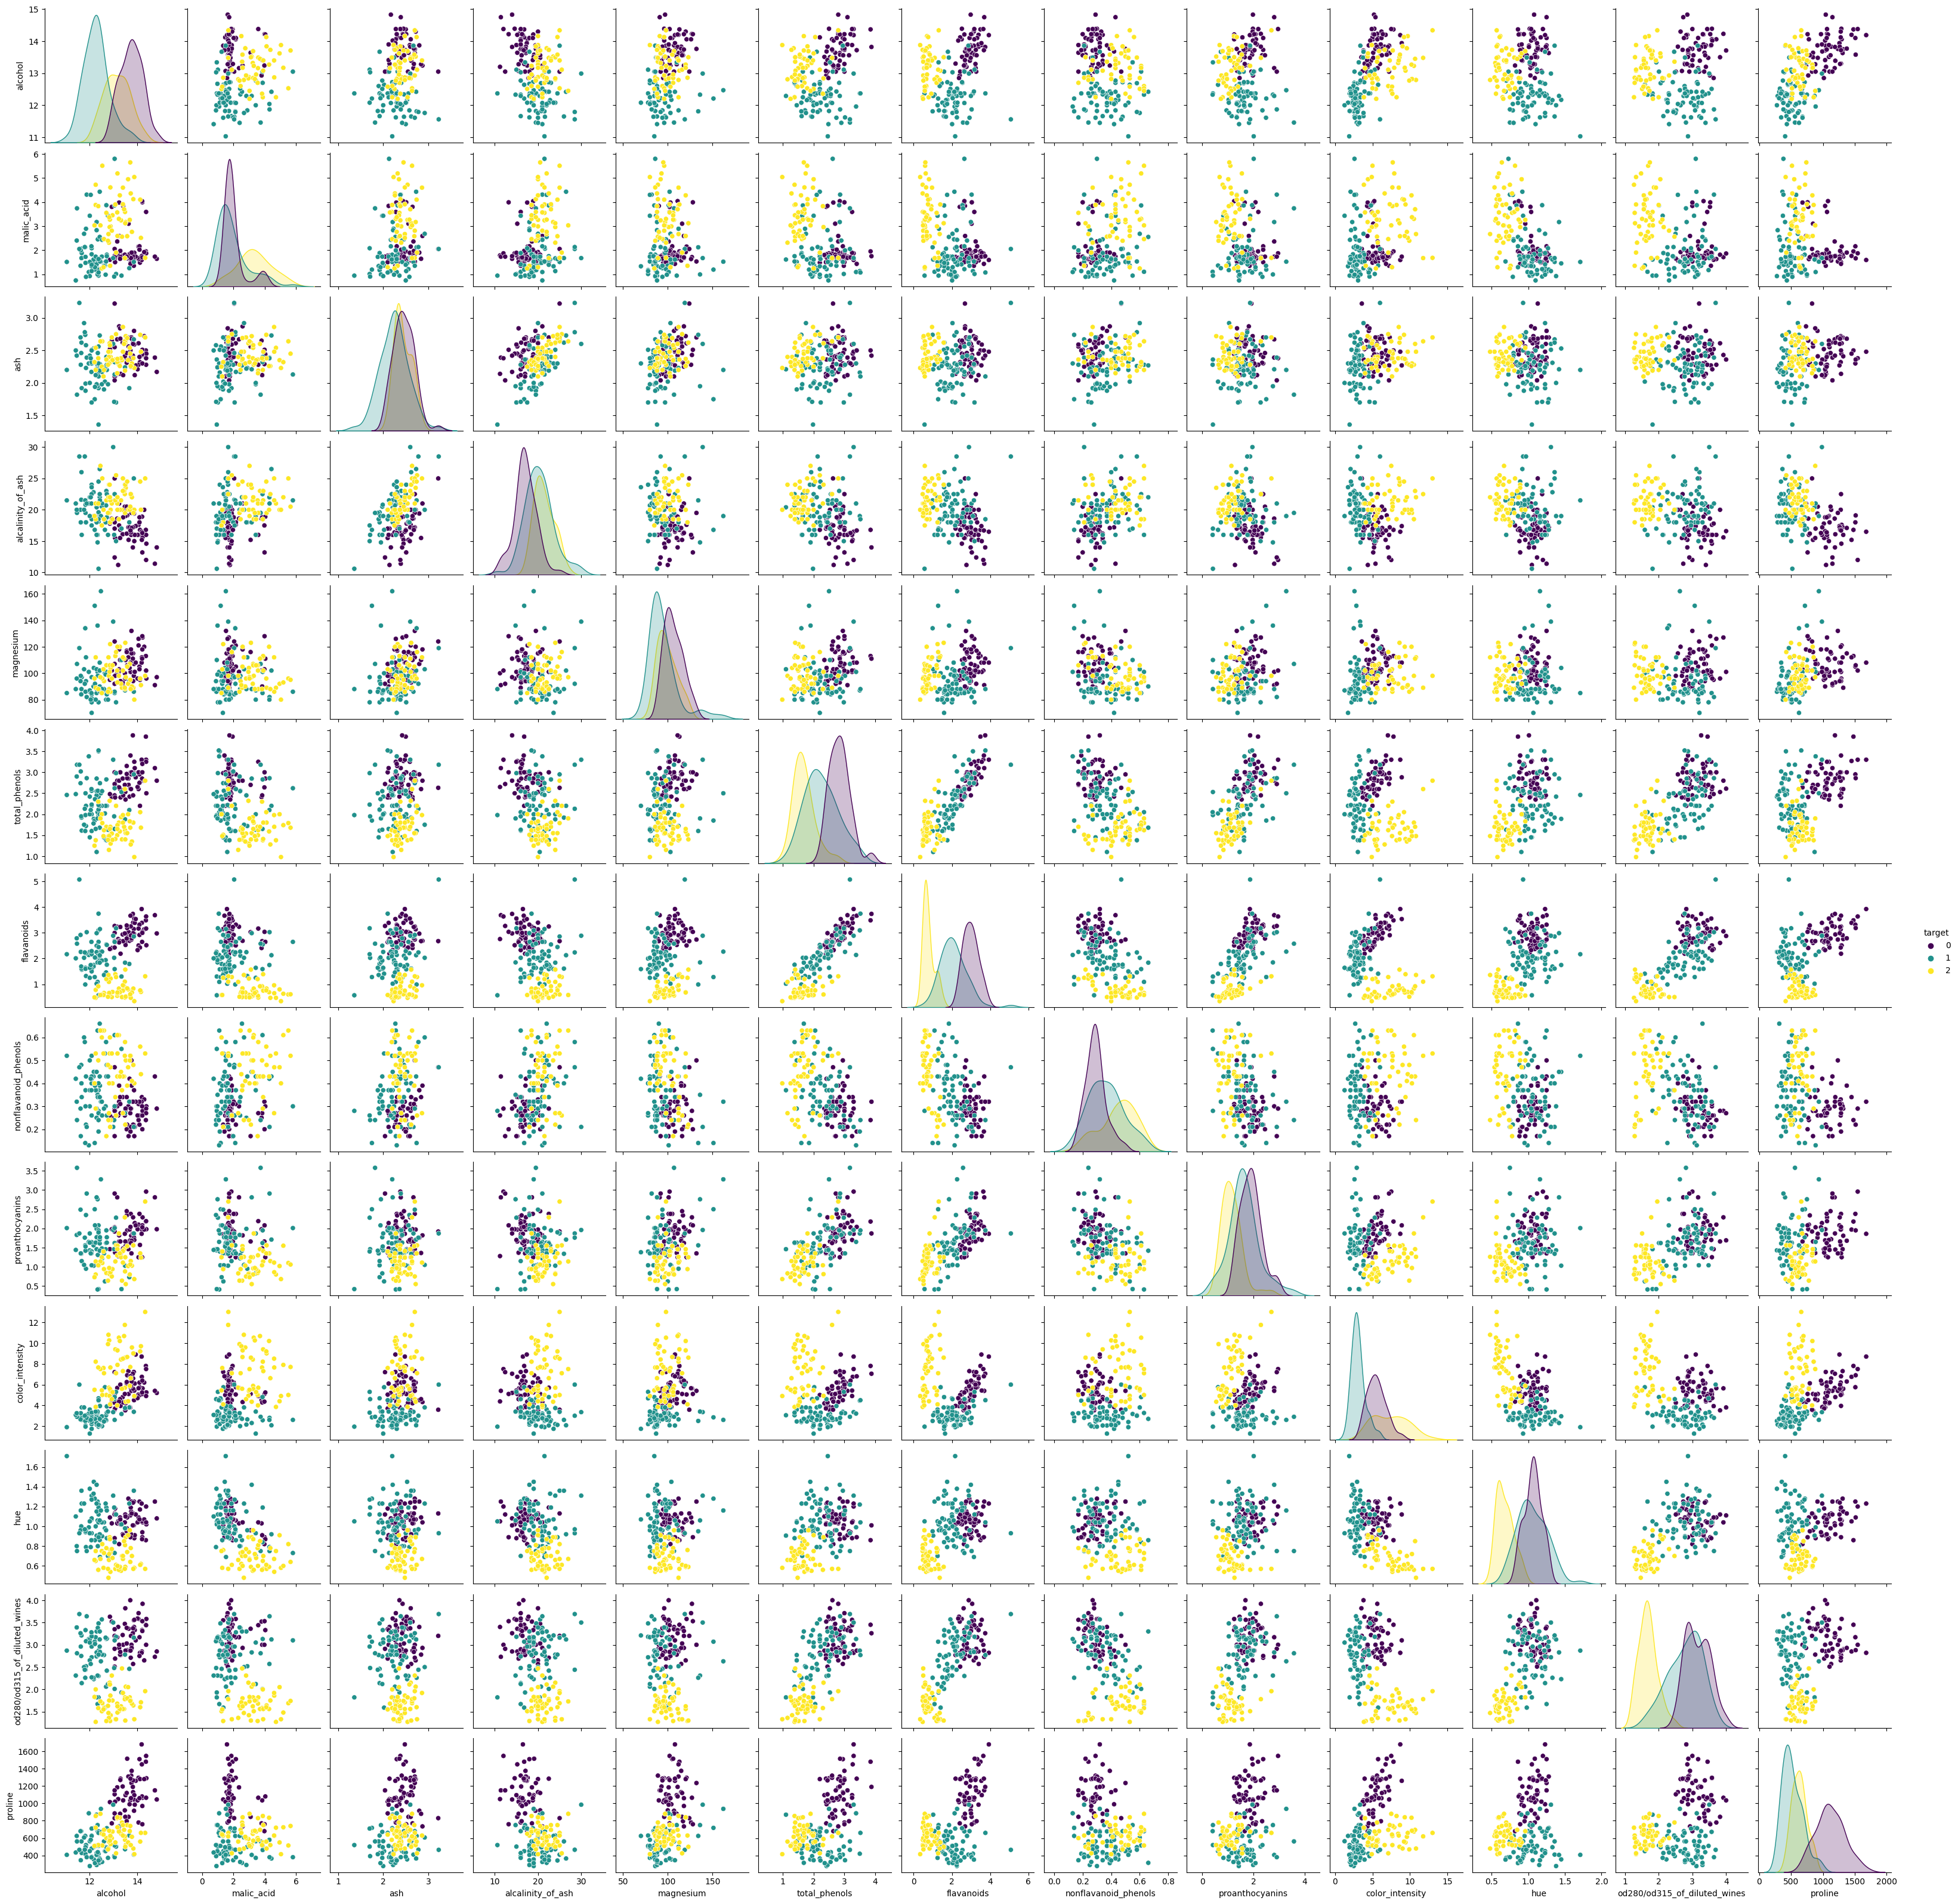

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

features = data.feature_names

sns.pairplot(df, vars=features[:13], hue='target', palette = 'viridis' )
plt.tight_layout()

- A ojímetro podemos ver que en el subespacio (od280/od315_of_diluted_wines,proline), se separan los datos en tres clusters para cada tipo de vino. En general para toda la fila de proline (es decir, proline vs todas las otras features) se observa que los tres tipos de vino se separan en clusters. Esto es consistente con el resultado de PCA donde proline es la feature que más alineada está con el autovector correspondiente al mayor autovalor.

# Train PCA

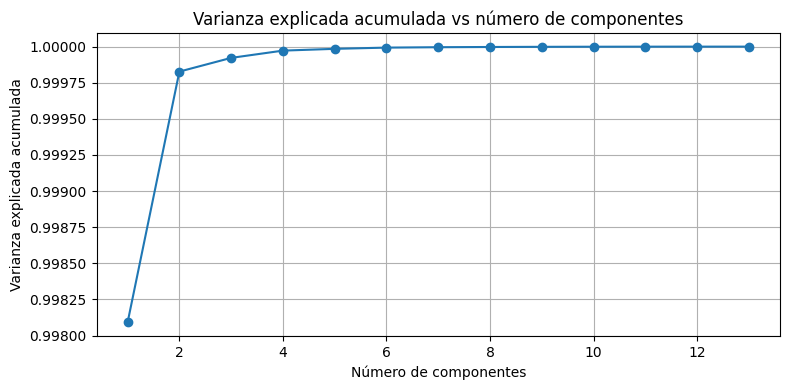

In [43]:
from pca import PCA
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine

data = load_wine()
X = data.data
y = data.target

n_components = len(X[0,:])

pca = PCA(n_components = n_components)
pca.fit(X)

fig = plt.figure(figsize=(8, 4))
plt.plot(np.arange(1,n_components+1),pca.evr_, 'o-')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada vs número de componentes')
plt.grid()
plt.tight_layout()
plt.show()

# Plot de las primeras dos componentes principales

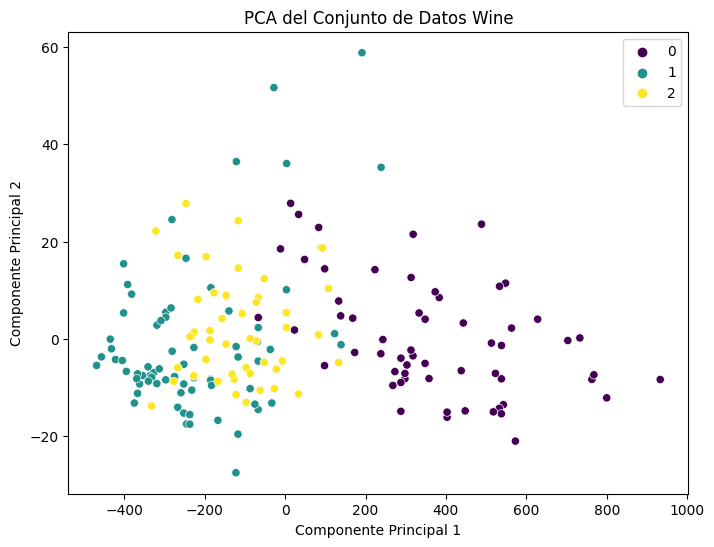

                                   PC1       PC2
alcohol                       0.001659  0.001203
malic_acid                   -0.000681  0.002155
ash                           0.000195  0.004594
alcalinity_of_ash            -0.004671  0.026450
magnesium                     0.017868  0.999344
total_phenols                 0.000990  0.000878
flavanoids                    0.001567 -0.000052
nonflavanoid_phenols         -0.000123 -0.001354
proanthocyanins               0.000601  0.005004
color_intensity               0.002327  0.015100
hue                           0.000171 -0.000763
od280/od315_of_diluted_wines  0.000705 -0.003495
proline                       0.999823 -0.017774


In [27]:
import seaborn as sns
import pandas as pd

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA del Conjunto de Datos Wine')
plt.show()


loadings = pd.DataFrame(pca.components_, columns=['PC1', 'PC2'], index=data.feature_names)
print(loadings)

# Plot de las primeras tres componentes principales

In [28]:
import plotly.express as px

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

df_pca = pd.concat([pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']), pd.Series(y, name='target')], axis=1)
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='target', opacity=0.7)
fig.show()

# Train PCA (sklearn)

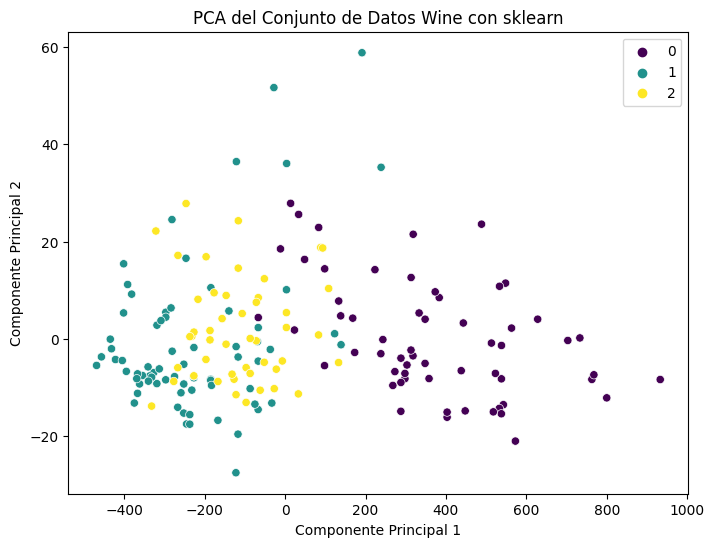

                                   PC1       PC2
alcohol                       0.001659  0.001203
malic_acid                   -0.000681  0.002155
ash                           0.000195  0.004594
alcalinity_of_ash            -0.004671  0.026450
magnesium                     0.017868  0.999344
total_phenols                 0.000990  0.000878
flavanoids                    0.001567 -0.000052
nonflavanoid_phenols         -0.000123 -0.001354
proanthocyanins               0.000601  0.005004
color_intensity               0.002327  0.015100
hue                           0.000171 -0.000763
od280/od315_of_diluted_wines  0.000705 -0.003495
proline                       0.999823 -0.017774


In [29]:
from sklearn.decomposition import PCA as sklearnPCA

data = load_wine()
X = data.data
y = data.target

sklearn_pca = sklearnPCA(n_components=2)
X_sklearn_pca = sklearn_pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_sklearn_pca[:, 0], y=X_sklearn_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA del Conjunto de Datos Wine con sklearn')
plt.show()

loadings_sklearn = pd.DataFrame(sklearn_pca.components_.T, columns=['PC1', 'PC2'], index=data.feature_names)
print(loadings_sklearn)

# Plot de las primeras dos componentes principales (sklearn)

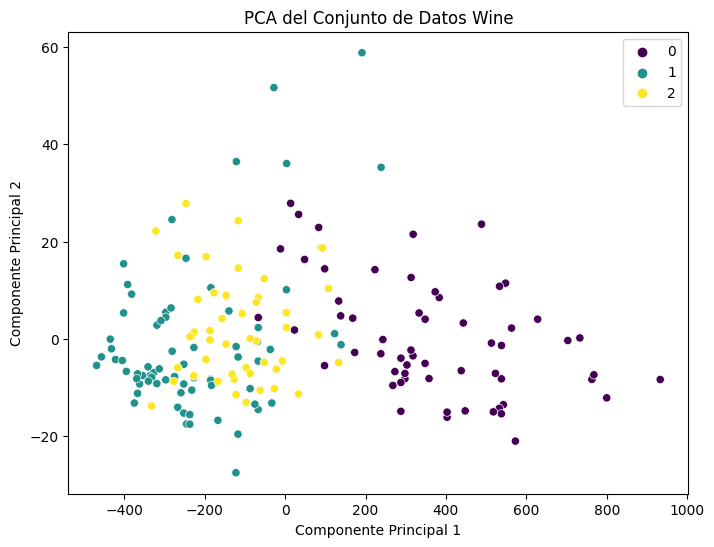

                                   PC1       PC2
alcohol                       0.001659  0.001203
malic_acid                   -0.000681  0.002155
ash                           0.000195  0.004594
alcalinity_of_ash            -0.004671  0.026450
magnesium                     0.017868  0.999344
total_phenols                 0.000990  0.000878
flavanoids                    0.001567 -0.000052
nonflavanoid_phenols         -0.000123 -0.001354
proanthocyanins               0.000601  0.005004
color_intensity               0.002327  0.015100
hue                           0.000171 -0.000763
od280/od315_of_diluted_wines  0.000705 -0.003495
proline                       0.999823 -0.017774


In [30]:
import seaborn as sns
import pandas as pd

sklearn_pca = sklearnPCA(n_components=2)
X_sklearn_pca = sklearn_pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA del Conjunto de Datos Wine')
plt.show()

loadings_sklearn = pd.DataFrame(sklearn_pca.components_.T, columns=['PC1', 'PC2'], index=data.feature_names)
print(loadings_sklearn)

# Plot de las primeras tres componentes principales (sklearn)

In [31]:
import plotly.express as px

sklearn_pca = sklearnPCA(n_components=3)
X_sklearn_pca = sklearn_pca.fit_transform(X)

df_pca = pd.concat([pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']), pd.Series(y, name='target')], axis=1)
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='target', opacity=0.7)
fig.show()

loadings_sklearn = pd.DataFrame(sklearn_pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=data.feature_names)
print(loadings_sklearn)

                                   PC1       PC2       PC3
alcohol                       0.001659  0.001203 -0.016874
malic_acid                   -0.000681  0.002155 -0.122003
ash                           0.000195  0.004594 -0.051987
alcalinity_of_ash            -0.004671  0.026450 -0.938593
magnesium                     0.017868  0.999344  0.029780
total_phenols                 0.000990  0.000878  0.040485
flavanoids                    0.001567 -0.000052  0.085443
nonflavanoid_phenols         -0.000123 -0.001354 -0.013511
proanthocyanins               0.000601  0.005004  0.024659
color_intensity               0.002327  0.015100 -0.291398
hue                           0.000171 -0.000763  0.025978
od280/od315_of_diluted_wines  0.000705 -0.003495  0.070324
proline                       0.999823 -0.017774 -0.004529
